# Notebook 1: Data Preparation

# Challenge

# Data

In [1]:
import json  
import pandas as pd
#import spacy  
import progressbar
from csv import writer
from io import StringIO
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
#from utils import most_freq_answer #https://github.com/sominwadhwa/vqamd_floyd

import pickle
from pickle import dump

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import gc
import cv2
import matplotlib.pyplot as plt

import operator

## Saving in .pickle


In [2]:
def save_clean_data(sentences, filename):
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)

### Function for choosing of the most popular answer from given 10

In [3]:
def most_freq_answer(values):
    ans_dict = {}
    for index in range(10):
        ans_dict[values[index]['answer']] = 1
    for index in range(10):
        ans_dict[values[index]['answer']] += 1

    return max(ans_dict.items(), key = operator.itemgetter(1))[0]

# Create all relevant data-dumps required


In [4]:
#TrainingSet
ann = './../VQA_data/trainSet/v2_mscoco_train2014_annotations.json'
ques = '../VQA_data/trainSet/v2_OpenEnded_mscoco_train2014_questions.json'
relation='../VQA_data/trainSet/v2_mscoco_train2014_complementary_pairs.json'
#ValidationSet
annV = './../VQA_data/validationSet/v2_mscoco_val2014_annotations.json'
quesV = '../VQA_data/validationSet/v2_OpenEnded_mscoco_val2014_questions.json'
relationV='../VQA_data/validationSet/v2_mscoco_val2014_complementary_pairs.json'
#TestSet
quesT = '../VQA_data/testSet/v2_OpenEnded_mscoco_test2015_questions.json'

# Open DataSets

In [5]:
ques = json.load(open(ques,'r'))
questions = ques['questions']
qa = json.load(open(ann,'r'))
annotations = qa['annotations']
qRelation=json.load(open(relation,'r'))

In [6]:
quesV = json.load(open(quesV,'r'))
questionsV = quesV['questions']
qaV = json.load(open(annV,'r'))
annotationsV = qaV['annotations']
qRelationV=json.load(open(relationV,'r'))

In [7]:
quesT = json.load(open(quesT,'r'))
questionsT = quesT['questions']

# Lets look what's inside

In [8]:
x=0
qa["annotations"][x]

{'question_type': 'what is this',
 'multiple_choice_answer': 'net',
 'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 458752,
 'answer_type': 'other',
 'question_id': 458752000}

In [9]:
questions[x]

{'image_id': 458752,
 'question': 'What is this photo taken looking through?',
 'question_id': 458752000}

In [10]:
qRelation[x]

[158307014, 254204008]

In [11]:
annotations[x]["answers"][0]["answer"]

'net'

In [12]:
print(len(annotations))
print(len(questions))

443757
443757


In [13]:
most_freq_answer(annotations[x]["answers"])

'net'

# Lets process the data

### training set

### Wrong way to create csv:

### The code above took a night to be done for all data. The code below just seconds

### Right way:

In [14]:
output = StringIO()
csv_writer = writer(output)
csv_writer.writerow(["image_id","question","answer","train_val_test"])
for i in range(len(questions)): #TODO implement Progressbar
    if i%15000==0:
        print (i,"von",len(questions))
    csv_writer.writerow([questions[i]["image_id"],questions[i]["question"],most_freq_answer(annotations[i]["answers"]),"0"])
output.seek(0)
data_train = pd.read_csv(output)

0 von 443757
15000 von 443757
30000 von 443757
45000 von 443757
60000 von 443757
75000 von 443757
90000 von 443757
105000 von 443757
120000 von 443757
135000 von 443757
150000 von 443757
165000 von 443757
180000 von 443757
195000 von 443757
210000 von 443757
225000 von 443757
240000 von 443757
255000 von 443757
270000 von 443757
285000 von 443757
300000 von 443757
315000 von 443757
330000 von 443757
345000 von 443757
360000 von 443757
375000 von 443757
390000 von 443757
405000 von 443757
420000 von 443757
435000 von 443757


In [15]:
data_train.to_csv("data_train.csv",index=False)
data_train=[]


### validation set

In [16]:
output = StringIO()
csv_writer = writer(output)
csv_writer.writerow(["image_id","question","answer","train_val_test"])
for i in range(len(questionsV)): #TODO implement Progressbar
    if i%15000==0:
        print (i,"von",len(questionsV))
    csv_writer.writerow([questionsV[i]["image_id"],questionsV[i]["question"],most_freq_answer(annotationsV[i]["answers"]),"1"])
output.seek(0)
data_val = pd.read_csv(output)

0 von 214354
15000 von 214354
30000 von 214354
45000 von 214354
60000 von 214354
75000 von 214354
90000 von 214354
105000 von 214354
120000 von 214354
135000 von 214354
150000 von 214354
165000 von 214354
180000 von 214354
195000 von 214354
210000 von 214354


In [17]:
data_val.to_csv("data_val.csv",index=False)
#len(data_val)
data_val=[]

### test set

In [18]:
output = StringIO()
csv_writer = writer(output)
csv_writer.writerow(["image_id","question","answer","train_val_test"])
for i in range(len(questionsT)): #TODO implement Progressbar
    if i%15000==0:
        print (i,"von",len(questionsT))
    csv_writer.writerow([questionsT[i]["image_id"],questionsT[i]["question"],"NO_ANSWER","2"])
output.seek(0)
data_test = pd.read_csv(output)

0 von 447793
15000 von 447793
30000 von 447793
45000 von 447793
60000 von 447793
75000 von 447793
90000 von 447793
105000 von 447793
120000 von 447793
135000 von 447793
150000 von 447793
165000 von 447793
180000 von 447793
195000 von 447793
210000 von 447793
225000 von 447793
240000 von 447793
255000 von 447793
270000 von 447793
285000 von 447793
300000 von 447793
315000 von 447793
330000 von 447793
345000 von 447793
360000 von 447793
375000 von 447793
390000 von 447793
405000 von 447793
420000 von 447793
435000 von 447793


In [19]:
data_test.to_csv("data_test.csv",index=False)
data_test=[]

# Create another data set, that will be used for further work

In [20]:
data_train=pd.read_csv("data_train.csv")
data_val=pd.read_csv("data_val.csv")
data_test=pd.read_csv("data_test.csv")

data_complete = pd.concat([data_train, data_val.reindex(columns=data_train.columns)])
data_complete = pd.concat([data_complete, data_test.reindex(columns=data_complete.columns)])
data_complete.to_csv("data_complete.csv",index=False)
#temp_DataSet=temp_DataSet.drop("index",axis=1)
data_complete.head(20)

,image_id,question,answer,train_val_test
0,458752,What is this photo taken looking through?,net,0
1,458752,What position is this man playing?,pitcher,0
2,458752,What color is the players shirt?,orange,0
3,458752,Is this man a professional baseball player?,yes,0
4,262146,What color is the snow?,white,0
5,262146,What is the person doing?,skiing,0
6,262146,What color is the persons headwear?,red,0
7,524291,What is in the person's hand?,frisbee,0
8,524291,Is the dog waiting?,yes,0
9,524291,Is the dog looking at a tennis ball or frisbee?,frisbee,0


## Free the memory

In [21]:
ques = []
questions = []
qa = []
annotations = []
qRelation=[]

quesV = []
questionsV = []
qaV = []
annotationsV = []
qRelationV=[]
gc.collect()

20

# Start prepare the Data for the training

In [22]:
data=pd.read_csv("data_complete.csv")


## Define the number of classes for answer

In [23]:
num_classes=2000

## Tokenization of questions. 

In [24]:
maxlen = 23  # We will cut question after 23 words. So actually we are cutting nothing. 
            #The longest question is exactly 23 tokens long.



In [25]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(data["question"])
sequences = tokenizer.texts_to_sequences(data["question"].tolist())
word_index = tokenizer.word_index
tokenizer.oov_token
print('Found %s unique tokens.' % len(word_index))

Found 18702 unique tokens.


In [26]:
questions = pad_sequences(sequences)
questions.shape

(1105904, 23)

In [27]:
tokenizer_char = Tokenizer(lower=True,char_level=True)
tokenizer_char.fit_on_texts(data["question"])
sequences_char = tokenizer_char.texts_to_sequences(data["question"].tolist())
word_index = tokenizer_char.word_index
tokenizer_char.oov_token
print('Found %s unique tokens.' % len(word_index))

Found 62 unique tokens.


In [28]:
questions_char = pad_sequences(sequences_char)
questions_char.shape

(1105904, 100)

## Tokenization of answers and one-hot encoding

### one-hot encoding (switsched off because of huge ammount of memory needed)

In [29]:
data["answer"]=data["answer"].str.replace(' ','_')
data=data[data["answer"]!="NO_ANSWER"]
data.head(20)

,image_id,question,answer,train_val_test
0,458752,What is this photo taken looking through?,net,0
1,458752,What position is this man playing?,pitcher,0
2,458752,What color is the players shirt?,orange,0
3,458752,Is this man a professional baseball player?,yes,0
4,262146,What color is the snow?,white,0
5,262146,What is the person doing?,skiing,0
6,262146,What color is the persons headwear?,red,0
7,524291,What is in the person's hand?,frisbee,0
8,524291,Is the dog waiting?,yes,0
9,524291,Is the dog looking at a tennis ball or frisbee?,frisbee,0


In [30]:
tokenizer_onehot = Tokenizer(lower=True,num_words=num_classes,filters='!"#$%&()*+, -./:;<=>?@[\\]^`{|}~\t\n')
tokenizer_onehot.fit_on_texts(data["answer"].astype(str))
word_index = tokenizer_onehot.word_index
#print(word_index)
print('Found %s unique tokens.' % len(word_index))

answersOneHot = tokenizer_onehot.texts_to_matrix(data["answer"][data["answer"]!="NO_ANSWER"].astype(str).tolist())
answersOneHot.shape  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Found 28604 unique tokens.


(658111, 2000)

In [31]:
answersOneHot[1100]

array([0., 0., 0., ..., 0., 0., 0.])

## Save tokenizer

In [32]:
save_clean_data(tokenizer,"tokenizer"+str(num_classes)+".pickle")

Saved: tokenizer2000.pickle


In [33]:
save_clean_data(tokenizer_char,"tokenizer_char"+str(num_classes)+".pickle")

Saved: tokenizer_char2000.pickle


In [34]:
save_clean_data(tokenizer_onehot,"tokenizer_onehot"+str(num_classes)+".pickle")

Saved: tokenizer_onehot2000.pickle


### word-to-vec

#### Answer also can be presented as vector in GloVe vectorspace, but for firs experiment it wasn't used 

### Create trainings data. If answer is OOV, the row will be passed.

In [35]:
imgIds=np.asarray(data["image_id"])
quesOutput = StringIO()
ques_charOutput = StringIO()
imIdsOutput = StringIO()
#ansOnehotOutput= StringIO()
ansArgMaxOutput= StringIO()


csv_writerQues = writer(quesOutput)
csv_writer_charQues = writer(ques_charOutput)
csv_writerImIds = writer(imIdsOutput)
#csv_writerAnsOnehot = writer(ansOnehotOutput)
csv_writerAnsArgMax = writer(ansArgMaxOutput)

csv_writerQues.writerow([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
csv_writer_charQues.writerow([ x for x in range(100) ])
csv_writerImIds.writerow(["imgIds"])
#csv_writerAnsOnehot.writerow([x for x in range(num_classes)])
csv_writerAnsArgMax.writerow(["answer"])  
counter=0
for i in range(int(len(answersOneHot))): #TODO implement Progressbar
    #if data["train_val_test"].loc[i]==1:
    #    print("trainSet end: ",counter)
    if ""==tokenizer_onehot.sequences_to_texts([[np.argmax(answersOneHot[i])]])[0]:
        continue
    if i%35000==0:
        print (i,"von",len(answersOneHot))
    counter+=1
    csv_writerQues.writerow(questions[i])
    csv_writer_charQues.writerow(questions_char[i])
    csv_writerImIds.writerow([imgIds[i]])
    #csv_writerAnsOnehot.writerow(answersOneHot[i].astype(int))
    csv_writerAnsArgMax.writerow([np.argmax(answersOneHot[i].astype(int))])    

quesOutput.seek(0)
ques_charOutput.seek(0)
imIdsOutput.seek(0)
#ansOnehotOutput.seek(0)
ansArgMaxOutput.seek(0)



0 von 658111
35000 von 658111
70000 von 658111
175000 von 658111
210000 von 658111
245000 von 658111
280000 von 658111
315000 von 658111
350000 von 658111
385000 von 658111
420000 von 658111
455000 von 658111
490000 von 658111
525000 von 658111
560000 von 658111
630000 von 658111


0

In [36]:
print (data.shape,imgIds.shape,questions.shape,questions_char.shape)

(658111, 4) (658111,) (1105904, 23) (1105904, 100)


### Saving the results

In [37]:
questions=pd.read_csv(quesOutput)
#pd.DataFrame(answersOneHot).to_csv("questions.csv",index=False)
save_clean_data(questions,"questions"+str(num_classes)+".pickle")
questions=[]

Saved: questions2000.pickle


In [38]:
questions_char=pd.read_csv(ques_charOutput)
#pd.DataFrame(answersOneHot).to_csv("questions.csv",index=False)
save_clean_data(questions_char,"questions_char"+str(num_classes)+".pickle")
questions=[]

Saved: questions_char2000.pickle


In [39]:
#save_clean_data(np.asarray(answers),"answers.pickle")
imgIds = pd.read_csv(imIdsOutput)
#pd.DataFrame(imgIds).to_csv("imgIds.csv",index=False)
save_clean_data(imgIds,"imageIds"+str(num_classes)+".pickle")
imgIds=[]

Saved: imageIds2000.pickle


In [40]:
answersArgMax=pd.read_csv(ansArgMaxOutput)
pd.DataFrame(answersArgMax).to_csv("answersArgMax"+str(num_classes)+".csv",index=False)

In [41]:
gc.collect()
#answersOneHot=pd.read_csv(ansOnehotOutput)
#save_clean_data(np.asarray(answersOneHot),"answersOneHot"+str(num_classes)+".pickle") #!!!!!!!!!!!!!!!!!

120

In [42]:
#pd.DataFrame(answersOneHot).to_csv("answersOneHot"+str(num_classes)+".csv",index=False)

# Check saved data

## Load prepared data

In [67]:
num_classes=2000
file= open("questions"+str(num_classes)+".pickle","rb")
questions=pickle.load(file)
file.close()

In [68]:
file= open("questions_char"+str(num_classes)+".pickle","rb")
questions_char=pickle.load(file)
file.close()

In [69]:
file= open("imageIds"+str(num_classes)+".pickle","rb")
imgIds=pickle.load(file)
file.close()

In [70]:
#data=pd.read_csv("answersOneHot"+str(num_classes)+".csv")#,header=None)


In [71]:
dataArgMax=pd.read_csv("answersArgMax"+str(num_classes)+".csv")#,header=None)

## Load tokenizers

In [72]:
file= open("tokenizer"+str(num_classes)+".pickle","rb")
tokenizer=pickle.load(file)
file.close()

In [73]:
file= open("tokenizer_char"+str(num_classes)+".pickle","rb")
tokenizer_char=pickle.load(file)
file.close()

In [74]:
file= open("tokenizer_onehot"+str(num_classes)+".pickle","rb")
tokenizer_onehot=pickle.load(file)
file.close()

## Test of training set


In [121]:
num =406743#for 2000
#num= 389974 #for 1000
perfix="../VQA_data/trainSet/train2014/COCO_train2014_000000"
#perfix="../VQA_data/validationSet/val2014/COCO_val2014_000000"

../VQA_data/trainSet/train2014/COCO_train2014_000000524286.jpg


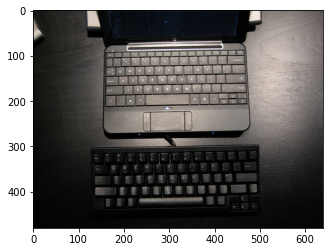

In [122]:
img = cv2.imread(perfix+str(imgIds.loc[num].values[0]).zfill(6)+".jpg")
print(perfix+str(imgIds.loc[num].values[0]).zfill(6)+".jpg")
#img = cv2.resize(img, network_size)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [123]:
print("question:",tokenizer.sequences_to_texts([questions.loc[num].values]))

question: ['is that a laptop']


In [124]:
print("question_char:",tokenizer_char.sequences_to_texts([questions_char.loc[num].values]))

question_char: ['i s   t h a t   a   l a p t o p ?']


In [125]:
#print("answer:",tokenizer_onehot.sequences_to_texts([[int(np.argmax(data.loc[num]))]]))

In [126]:
print("answerArgMax:",tokenizer_onehot.sequences_to_texts([dataArgMax.loc[num]]))

answerArgMax: ['yes']


## Test of validation set

In [127]:
num =406744#for 2000
#num= 389975 #for 1000

#perfix="../VQA_data/trainSet/train2014/COCO_train2014_000000"
perfix="../VQA_data/validationSet/val2014/COCO_val2014_000000"

../VQA_data/validationSet/val2014/COCO_val2014_000000262148.jpg


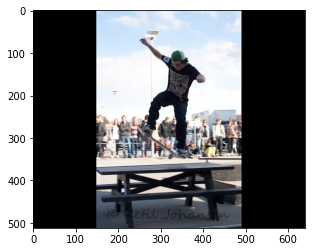

In [128]:
img = cv2.imread(perfix+str(imgIds.loc[num].values[0]).zfill(6)+".jpg")
print(perfix+str(imgIds.loc[num].values[0]).zfill(6)+".jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [129]:
print("question:",tokenizer.sequences_to_texts([questions.loc[num].values]))

question: ['where is he looking']


In [130]:
print("question_char:",tokenizer_char.sequences_to_texts([questions_char.loc[num].values]))

question_char: ['w h e r e   i s   h e   l o o k i n g ?']


In [131]:
#print("answer:",tokenizer_onehot.sequences_to_texts([[int(np.argmax(data.loc[num]))]]))

In [132]:
print("answerArgMax:",tokenizer_onehot.sequences_to_texts([dataArgMax.loc[num]]))

answerArgMax: ['down']


In [133]:
tokenizer_onehot.index_word

{1: 'no',
 2: 'yes',
 3: '2',
 4: '1',
 5: 'white',
 6: '3',
 7: 'red',
 8: 'blue',
 9: 'black',
 10: '0',
 11: '4',
 12: 'green',
 13: 'brown',
 14: 'yellow',
 15: '5',
 16: 'gray',
 17: '6',
 18: 'nothing',
 19: 'left',
 20: 'right',
 21: 'frisbee',
 22: 'baseball',
 23: 'tennis',
 24: 'orange',
 25: 'wood',
 26: 'pizza',
 27: 'bathroom',
 28: 'none',
 29: '10',
 30: 'pink',
 31: 'kitchen',
 32: '8',
 33: '7',
 34: 'man',
 35: 'cat',
 36: 'grass',
 37: 'water',
 38: 'dog',
 39: 'black_and_white',
 40: 'skiing',
 41: 'skateboarding',
 42: 'silver',
 43: '12',
 44: 'kite',
 45: 'surfing',
 46: 'horse',
 47: 'living_room',
 48: '9',
 49: 'skateboard',
 50: 'phone',
 51: 'snow',
 52: 'giraffe',
 53: 'wii',
 54: 'cake',
 55: 'surfboard',
 56: 'broccoli',
 57: 'woman',
 58: 'table',
 59: 'food',
 60: 'eating',
 61: 'sunny',
 62: 'apple',
 63: 'stop',
 64: '20',
 65: 'purple',
 66: 'hat',
 67: 'elephant',
 68: 'train',
 69: 'laptop',
 70: 'standing',
 71: 'motorcycle',
 72: 'beach',
 73: 's

In [134]:
tokenizer_onehot.texts_to_matrix(tokenizer_onehot.sequences_to_texts([dataArgMax.loc[num]]))

array([[0., 0., 0., ..., 0., 0., 0.]])

In [135]:
to_categorical(dataArgMax.loc[num], num_classes=num_classes)[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [136]:
tokenizer_onehot.sequences_to_texts([[np.argmax(to_categorical(dataArgMax.loc[num], num_classes=num_classes))]])

['down']